<a href="https://colab.research.google.com/github/SivarasaKajananan/Food-identification-using-Gemini-/blob/main/Calorie_calculation_with_Gemini.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
!pip install -q -U google-generativeai

In [2]:
from pathlib import Path
import google.generativeai as genai

In [3]:
from google.colab import userdata
GOOGLE_API_KEY=userdata.get('Gemini')
genai.configure(api_key=GOOGLE_API_KEY)

In [4]:
# Set up the model
generation_config = {
  "temperature": 0.4,
  "top_p": 1,
  "top_k": 32,
  "max_output_tokens": 4096,
}

safety_settings = [
  {
    "category": "HARM_CATEGORY_HARASSMENT",
    "threshold": "BLOCK_MEDIUM_AND_ABOVE"
  },
  {
    "category": "HARM_CATEGORY_HATE_SPEECH",
    "threshold": "BLOCK_MEDIUM_AND_ABOVE"
  },
  {
    "category": "HARM_CATEGORY_SEXUALLY_EXPLICIT",
    "threshold": "BLOCK_MEDIUM_AND_ABOVE"
  },
  {
    "category": "HARM_CATEGORY_DANGEROUS_CONTENT",
    "threshold": "BLOCK_MEDIUM_AND_ABOVE"
  },
]

In [5]:
model = genai.GenerativeModel(model_name="gemini-pro-vision",
                              generation_config=generation_config,
                              safety_settings=safety_settings)

In [6]:
from google.colab import files
fl=files.upload()

Saving rice.jpg to rice.jpg


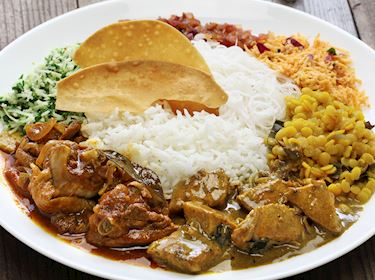

In [7]:
import PIL.Image
image_path='rice.jpg'
img = PIL.Image.open(image_path)
img

In [8]:
# Validate that an image is present
if not (img := Path(image_path)).exists():
  raise FileNotFoundError(f"Could not find image: {img}")

In [9]:
image_parts = [
  {
    "mime_type": "image/jpeg",
    "data": Path(image_path).read_bytes()
  },
]

prompt_parts = [
  image_parts[0],
  "give the list of food items in image:, give the calrioes of each items:, give total calories: ,dont give anyother data other than it",
]

In [10]:
response = model.generate_content(prompt_parts)
print(response.text)

 1. Rice - 200 calories
2. Chicken - 200 calories
3. Dhal - 150 calories
4. Vegetables - 100 calories
5. Papadam - 100 calories
6. Total calories: 750 calories
